In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
import seaborn as sns
from tabulate import tabulate 
# import latextable
from texttable import Texttable
import pickle
import os
import random

# 1. Loading in the files


In [2]:
def load_in_files():
    data_n = pd.read_pickle('../Dataset/Normal/normal_dataset.pkl')
    data_a = pd.read_pickle('../Dataset/Anomalies/anom.pkl')
    return data_n, data_a

data_n, data_a = load_in_files()

# 2. Distribution of features and their visualisation

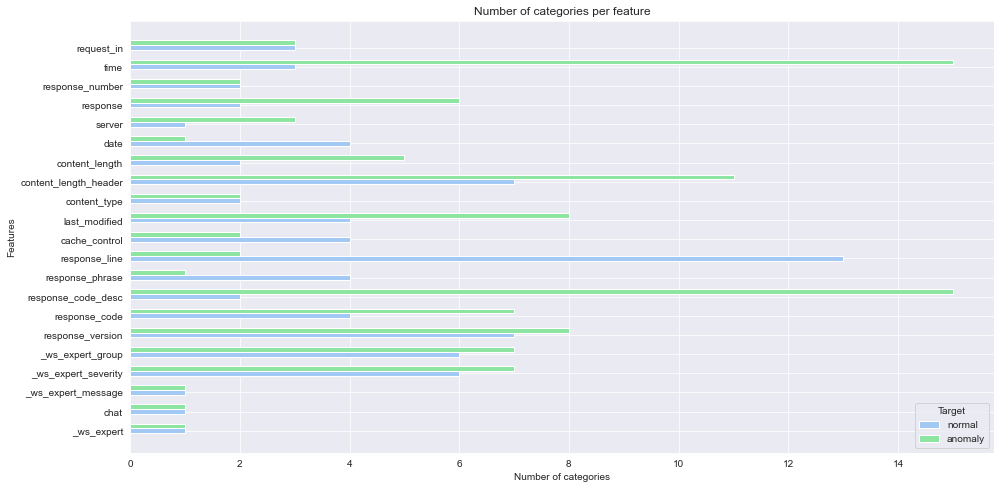

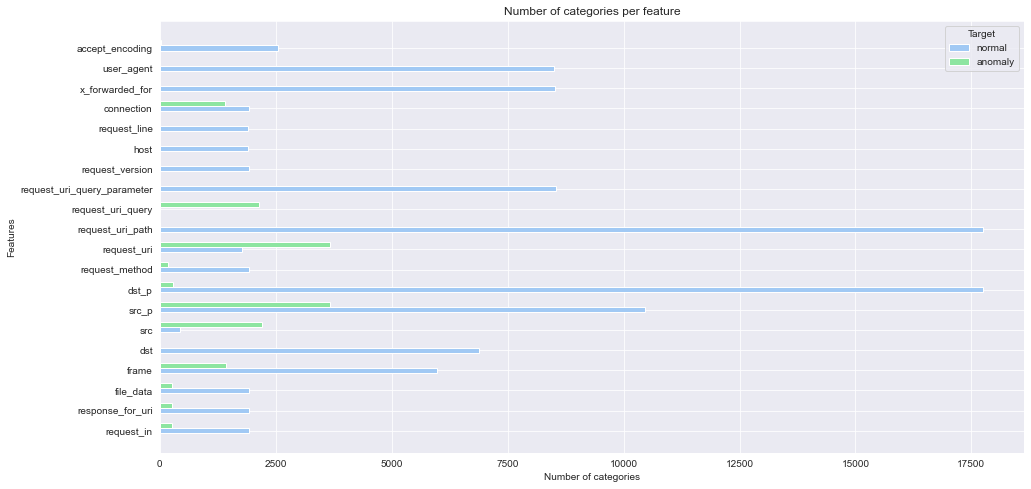

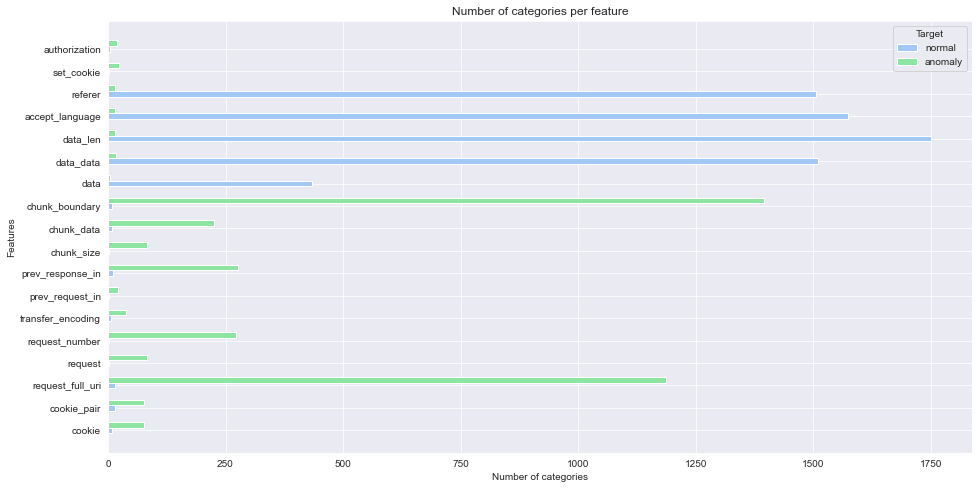

In [3]:
def distribution(i,n,data_n,data_a):
    d1 = [len(data_n[col].unique()) for col in data_n.columns]
    d2 = [len(data_a[col].unique()) for col in data_a.columns]
    
    d1_med = mediann(d1)
    d2_med = mediann(d2)
    d1_1,d1_2,d1_3,d2_1,d2_2,d2_3 = split(d1,d2,d1_med,d2_med)
    data = [(d1_1,d2_1),(d1_2,d2_2),(d1_3,d2_3)]
    inx = [0,len(d1_1)-1, len(d1_1)+len(d1_2)]
    ind = [len(data[0][0]),len(d1_1)+len(d1_2)-1,len(d1)-1,len(d1_1)+len(d1_2)-1]
    
    for i in range(3):
        sns.set_style('darkgrid')
        sns.color_palette('pastel')
        X = np.arange(len(data_a.columns))
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_axes([0,0,1,1])
        ax.barh(X[inx[i]:ind[i]] + 0.00,data[i][0],0.25, color= sns.color_palette('pastel')[0],label='normal')
        ax.barh(X[inx[i]:ind[i]] + 0.25, data[i][1], 0.25,color= sns.color_palette('pastel')[2],label='anomaly')
        ax.set_yticks(X[inx[i]:ind[i]], data_n.columns[inx[i]:ind[i]])
        ax.legend(title='Target')
        plt.xlabel('Number of categories')
        plt.ylabel('Features')
        plt.title('Number of categories per feature')
    
def mediann(lst):
    n = len(lst)
    s = sorted(lst)
    return np.median(lst)

def split(d1,d2,d1_med,d2_med):
    d1_1 = []
    d1_2 = []
    d1_3 = []
    d2_1 = []
    d2_2 = []
    d2_3 = []
    if len(d1) > len(d2):
        index = d2
    else:
        index = d1
    for i in range(len(index)):
        if d1[i] <= d2_med and d2[i] <= d2_med:
            d1_1.append(d1[i])
            d2_1.append(d2[i])
        
        elif d1[i] <= np.mean(d1) and d2[i] <= np.mean(d1):
            d1_3.append(d1[i])
            d2_3.append(d2[i])
        else:
            d1_2.append(d1[i])
            d2_2.append(d2[i])
    return d1_1,d1_2,d1_3,d2_1,d2_2,d2_3



distribution(0,len(data_n),data_n,data_a)


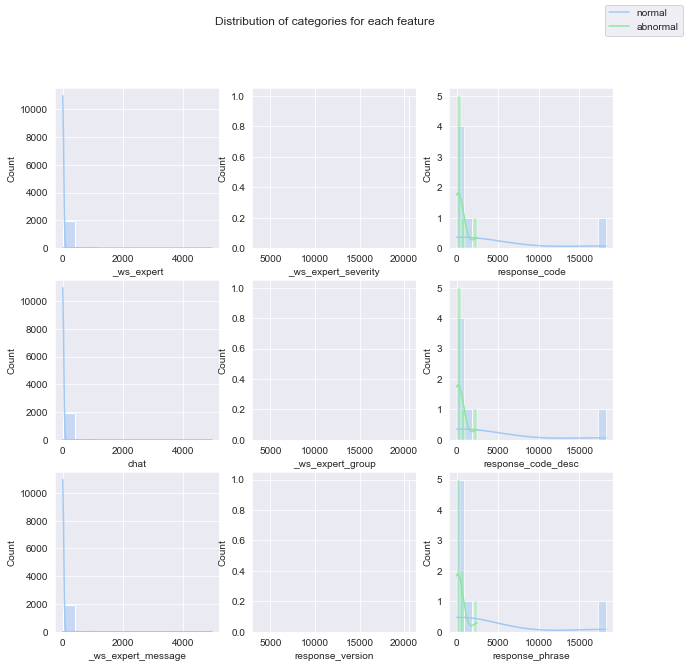

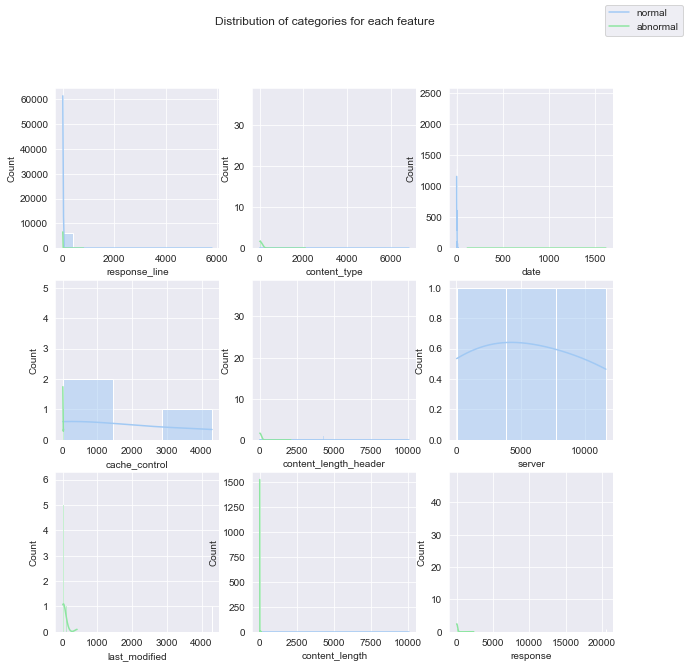

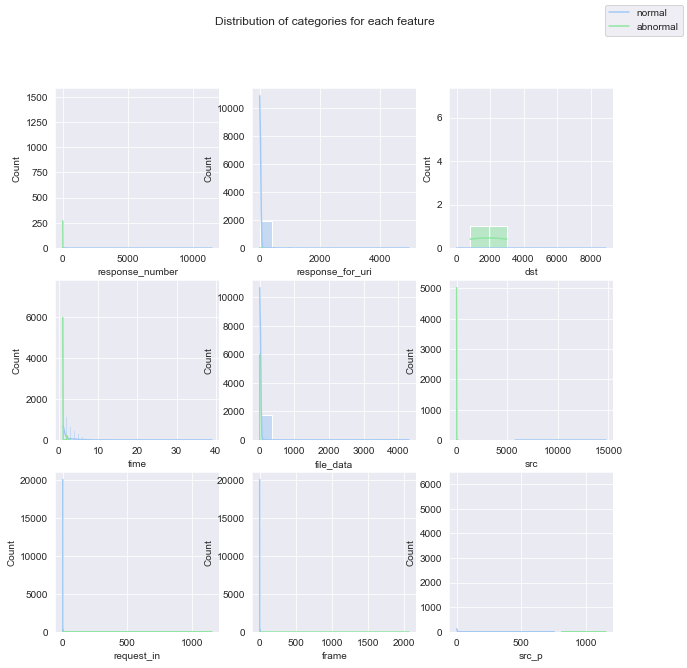

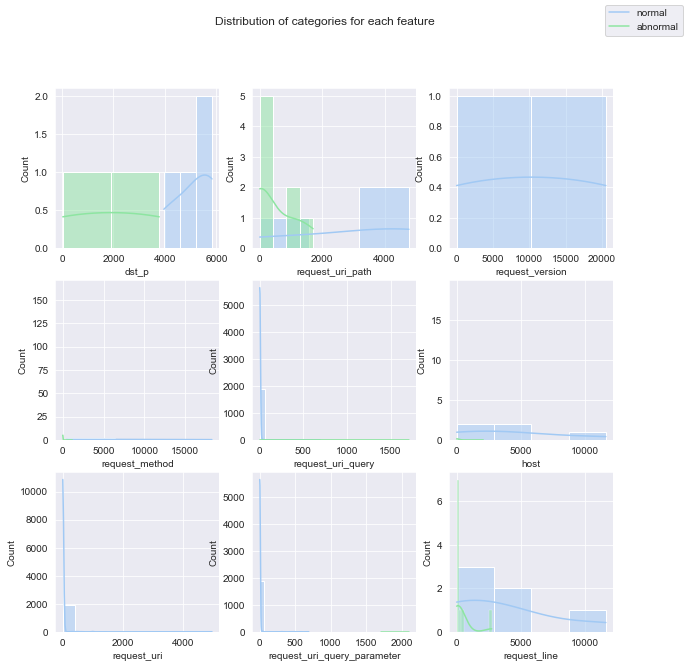

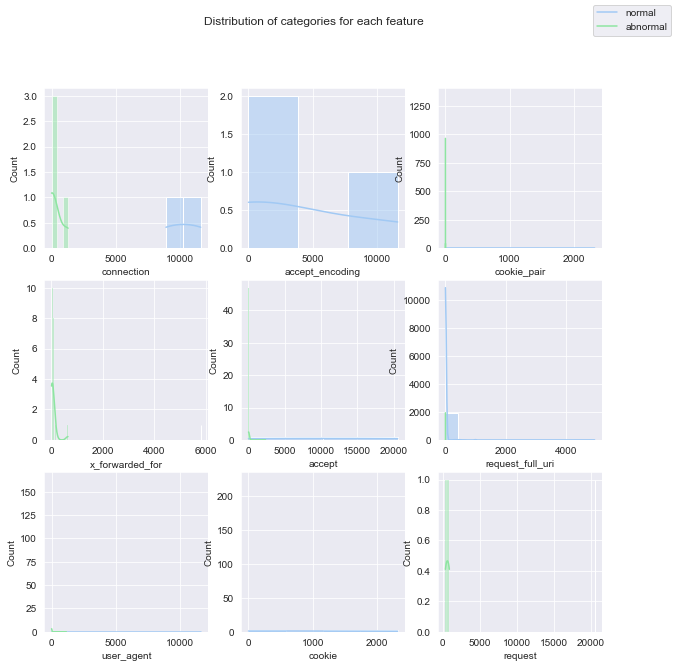

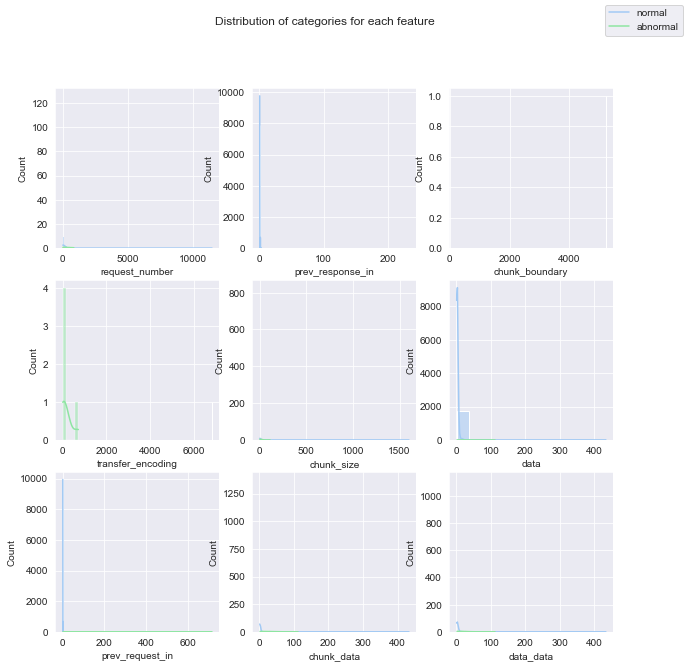

In [4]:
from scipy.stats import rankdata, norm
        
def visualise_distribution(data_n,data_a):
    for m in range(6):
        fig, axs = plt.subplots(3,3, figsize=(10,10))
        count=[0,9,18,27,36,45][m]
        for j in range(3):
            for i in range(3):
                sns.histplot(data_n[data_n.columns[count]].value_counts(),kde=True, color=sns.color_palette('pastel')[0], ax=axs[i,j],label='normal',legend=True)
                sns.histplot(data_a[data_a.columns[count]].value_counts(),kde=True,   color=sns.color_palette('pastel')[2], ax=axs[i,j],label='abnormal',legend=True)
                count+=1

        fig.suptitle('Distribution of categories for each feature')
        fig.legend(['normal','abnormal'])
        plt.show()
visualise_distribution(data_n,data_a)

None of my features seem to be normal distributed, but the distribution for anomalies and for normal behaviour do look significantly different.

## 2.1 Visualising NANS and the union of features between the labels

NAN N  feat N  total N  NAN A  feat A  total A
request_uri_path             11459    9084    20543   3698     110     3808
request_uri_query            11459    9084    20543   3698     110     3808
request_uri_query_parameter  11459    9084    20543   3698     110     3808
request_version                  0   20543    20543      0    3808     3808
host                             1   20542    20543      0    3808     3808
request_line                     1   20542    20543      0    3808     3808
connection                       0   20543    20543      0    3808     3808
x_forwarded_for              14744    5799    20543   2997     811     3808
user_agent                       1   20542    20543      0    3808     3808
accept_encoding               8917   11626    20543   3709      99     3808
accept                           1   20542    20543     85    3723     3808
cookie                       13717    6826    20543   2892     916     3808
cookie_pair                  13717    6826    20543   2892     916     3808
request_full_uri                 1   20542    20543      0    3808     3808
request                          0   20543    20543      0    3808     3808
request_number                   0   20543    20543      0    3808     3808
transfer_encoding            13721    6822    20543   3576     232     3808
prev_request_in              11448    9095    20543   2357    1451     3808
prev_response_in             11447    9096    20543   2360    1448     3808
chunk_size                   13721    6822    20543   3576     232     3808
chunk_data                   15321    5222    20543   3578     230     3808
chunk_boundary               15321    5222    20543   3578     230     3808
data                         15321    5222    20543   3578     230     3808
data_data                    15321    5222    20543   3578     230     3808
data_len                     15321    5222    20543   3578     230     3808
accept_language              20540       3    20543   2417    1391     3808
referer                      20542       1    20543   2497    1311     3808
set_cookie                   20535       8    20543   3360     448     3808
authorization                20539       4    20543      0       0        0
authbasic                    20539       4    20543      0       0        0
location                         0       0        0   3776      32     3808

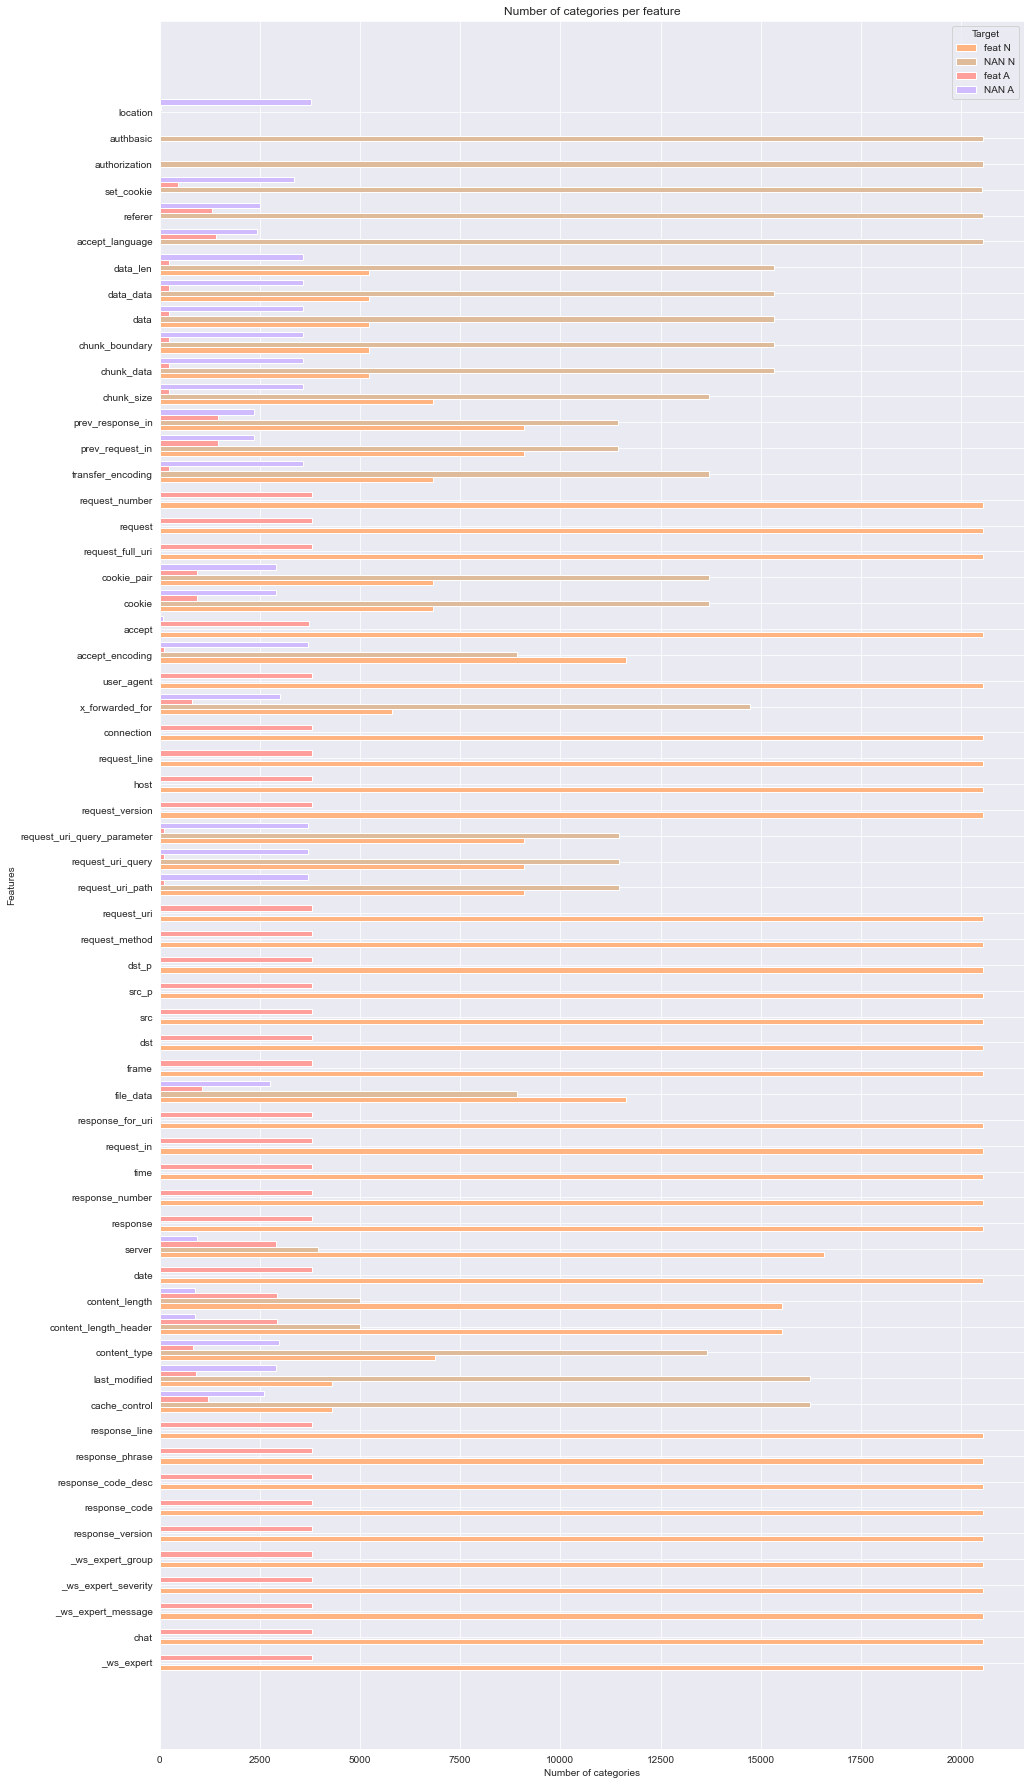

In [5]:
def visualizing_overlap_and_NANS(data_n,data_a):
    
    df = {}

    for col in data_n.columns:
        vals = [sum(data_n[col].isna()),len(data_n[col]) - sum(data_n[col].isna()), len(data_n[col])]
        
        if col in data_a.columns:     
            df[col] = vals
        else:
            df[col] = vals + [0,0,0]
    for col in data_a.columns:
        vals = [sum(data_a[col].isna()),len(data_a[col]) - sum(data_a[col].isna()), len(data_a[col])]
        
        if col not in df.keys():
            df[col] = [0,0,0] + vals
        else:
            df[col] += vals
    
    df1 =df
    df = pd.DataFrame(df,index=['NAN N','feat N','total N','NAN A','feat A','total A']).T
    display(df[30:])
    plotbar(df.values[:,1],df.values[:,0],df.values[:,4],df.values[:,3],df1.keys(),size=[12,24])
    
def plotbar(a,b,c,d,names,size=[12,6]):
    sns.set_style('darkgrid')
    sns.color_palette('pastel')
    X = np.arange(len(a))
    fig = plt.figure(figsize=size)
    ax = fig.add_axes([0,0,1,1])
    ax.barh(X -0.2,a,0.2, color= sns.color_palette('pastel')[1],label='feat N')
    ax.barh(X + 0.0,b, 0.2,color= sns.color_palette('pastel')[5],label='NAN N')
    ax.barh(X + 0.2,c,0.2, color= sns.color_palette('pastel')[3],label='feat A')
    ax.barh(X + 0.4,d, 0.2,color= sns.color_palette('pastel')[4],label='NAN A')
    ax.set_yticks(X, names)
    ax.legend(title='Target')
    plt.xlabel('Number of categories')
    plt.ylabel('Features')
    plt.title('Number of categories per feature')
        
visualizing_overlap_and_NANS(data_n, data_a)

We can see from these results that there is little overlap yet in the dataset, there are some features that are simply not present in the anomaly dataset 
and some features that are only present in the dataset. These are: in Anomaly dataset: location and _ws_string_trailing_stray_characters.
In normal they are authbasic and authorization. From this we can gather that these might be important. So maybe we do not want to take them out. 
Right now the datasets are still uneven, the anomolous dataset is way bigger than the normal dataset. moreover, we do not know which anomalies are represented exactly. We will need to look at that aswell.


When looking at this data it looks like I will need to add a data regularizer later on, to attribute the features that are a lot more present than the other classes less power, will need to see how this goes.. Otherwise it might overfit on the data. But need to do this by creating some heatmaps after running a model.

# 3. Preprocessing the data

In [175]:
import copy
import math
def remove_unessecary_data(data_n, data_a,data_remove):
    '''remove data that has no changing values or needs to be removed'''
    data = [data_n,data_a]
    for i in range(len(data)):
        data[i] = data[i].fillna(0)
        
        for col in data[i].columns:
            if col in data_remove or len(data[i][col].value_counts()) == 1:
                print('dataset', i, 'removed', col,'with only',len(data[i][col].value_counts()), 'specific values')
                data[i].pop(col)
             
    return data[0], data[1]


    
def even_dataset(data_n,data_a):
    '''create even datasets and remove columns that are not present in either one'''
    if len(data_n) > len(data_a):
        data_n = data_n.sample(n=len(data_a))
                  
    else:
        data_a = data_a.sample(n=len(data_n))
    return data_n,data_a
    

def cosine_similarity(df):
    '''calculate cosine similarity of all the features'''
    print(df.columns)
    feats = df.columns
    cos_sim_a = {}
    for feat in range(len(feats)):
        for feat2 in range(len(feats)):
            if feat != feat2:
                cos_sim = (df[feats[feat]] @ df[feats[feat2]].T) / (np.linalg.norm(df[feats[feat]])* np.linalg.norm(df[feats[feat2]]))
                if (feats[feat2],feats[feat]) not in cos_sim_a.keys():
                    cos_sim_a[feats[feat],feats[feat2]] = cos_sim 
    return cos_sim_a
    

def remove_cosine_sim_high(cossim,data):
    '''remove features that have a high cosine similarity '''
    highest = {}
    removed = set()
    for key,value in cossim.items():
        if value >= 0.98:
            if key[0] not in highest:
                highest[key[0]] = 1
            else:
                highest[key[0]] += 1
            if key[1] not in highest:
                highest[key[1]] = 1
            else:
                highest[key[1]] += 1
                
    for key,value in cossim.items():
        if value >= 0.98 and key[1] not in removed and key[0] not in removed:
            if highest[key[0]] >= highest[key[1]]:
                data.pop(key[1])
                removed.add(key[1])
            else:
                data.pop(key[0])
                removed.add(key[0])
    print(removed)
    return data
            
    
def specific_preprocessing(data):
    '''remove features specifically'''
    data_p_n = copy.deepcopy(data)
    data_p_n.cookie.fillna(data_p_n.set_cookie, inplace=True)

    for i in range(len(data['response_line'])):
        if data_p_n['response_line'][i][0] != 'x':
            data_p_n['response_line'][i] = 0
    return data_p_n

def remove_specific_data(data,to_keep):
    for i in range(2):
        for col in data[i].columns:
            if col not in to_keep:
                data[i].pop(col)
    return data[0],data[1]


def change_values(data, continuous, categorical):
    print('cont',continuous,'cat',categorical)
    for col in data.columns:
        if col in continuous: 
            data[col] = data[col].astype('float')
            print('string',col)
        elif col in categorical:
            print('num',col)
            data[col] = data[col].astype('str')
    return data
    
interesting_to_keep = set(('user_agent','response_code','response_line','cache_control','content_type' ,'content_length','date','server','time','file_data','dst','src','src_p','dst_p','request_method','request_uri','request_uri_query','x_forwarded_for','user_agent','cookie','transfer_encoding','referer','authorization','authbasic'))
data_remove = set(('_ws_expert', 'chat', '_ws_expert_message'))

data_p_n = specific_preprocessing(data_n)
data_p_a = specific_preprocessing(data_a)
data_n_e, data_a_e = remove_specific_data([data_p_n,data_p_a],interesting_to_keep)

data_n_p,data_a_p = remove_unessecary_data(data_p_n, data_p_a, data_remove)
data_n_e,data_a_e = even_dataset(data_n_p,data_a_p)
data_n_e_p,data_a_e_p = even_dataset(data_p_n,data_p_a)

data_n_e,data_a_e = remove_unessecary_data(data_n_e,data_a_e,[])
# print("Amount of data left:",data_n_e.shape,len(data_a_e))
print(data_n_e)


dataset 0 removed referer with only 1 specific values
      response_code           response_line      cache_control  \
8579            200                       0  public, max-age=0   
4580            200  x-powered-by: Express   public, max-age=0   
5929            200  x-powered-by: Express                   0   
3863            200                       0                  0   
11648           200  x-powered-by: Express   public, max-age=0   
...             ...                     ...                ...   
18452           200                       0                  0   
19217           201                       0                  0   
1295            200                       0                  0   
719             200                       0                  0   
6966            200  x-powered-by: Express                   0   

           content_type content_length                           date  \
8579   application/json          10364  Thu, 20 Apr 2023 14:36:45 GMT   
4580   

Removed the features that had only one specific value. This was donen for responses and requests seperatedly since they both have a lot of features that are not present in the other. We also evened out the dataset, so that we have the same number of calls in the normal dataset as the abnormal dataset. We also have a function checking the cosine similarity 


user agent erin houden 
body erin houden 
uid van inventory
domain knowledge aantoevoegen 

Have realised the the authentication is not present for the anomalies. But also almost not present for the normal, maybe because I did not create enough users.

Empty DataFrame
Columns: [NAN N, feat N, total N, NAN A, feat A, total A]
Index: []

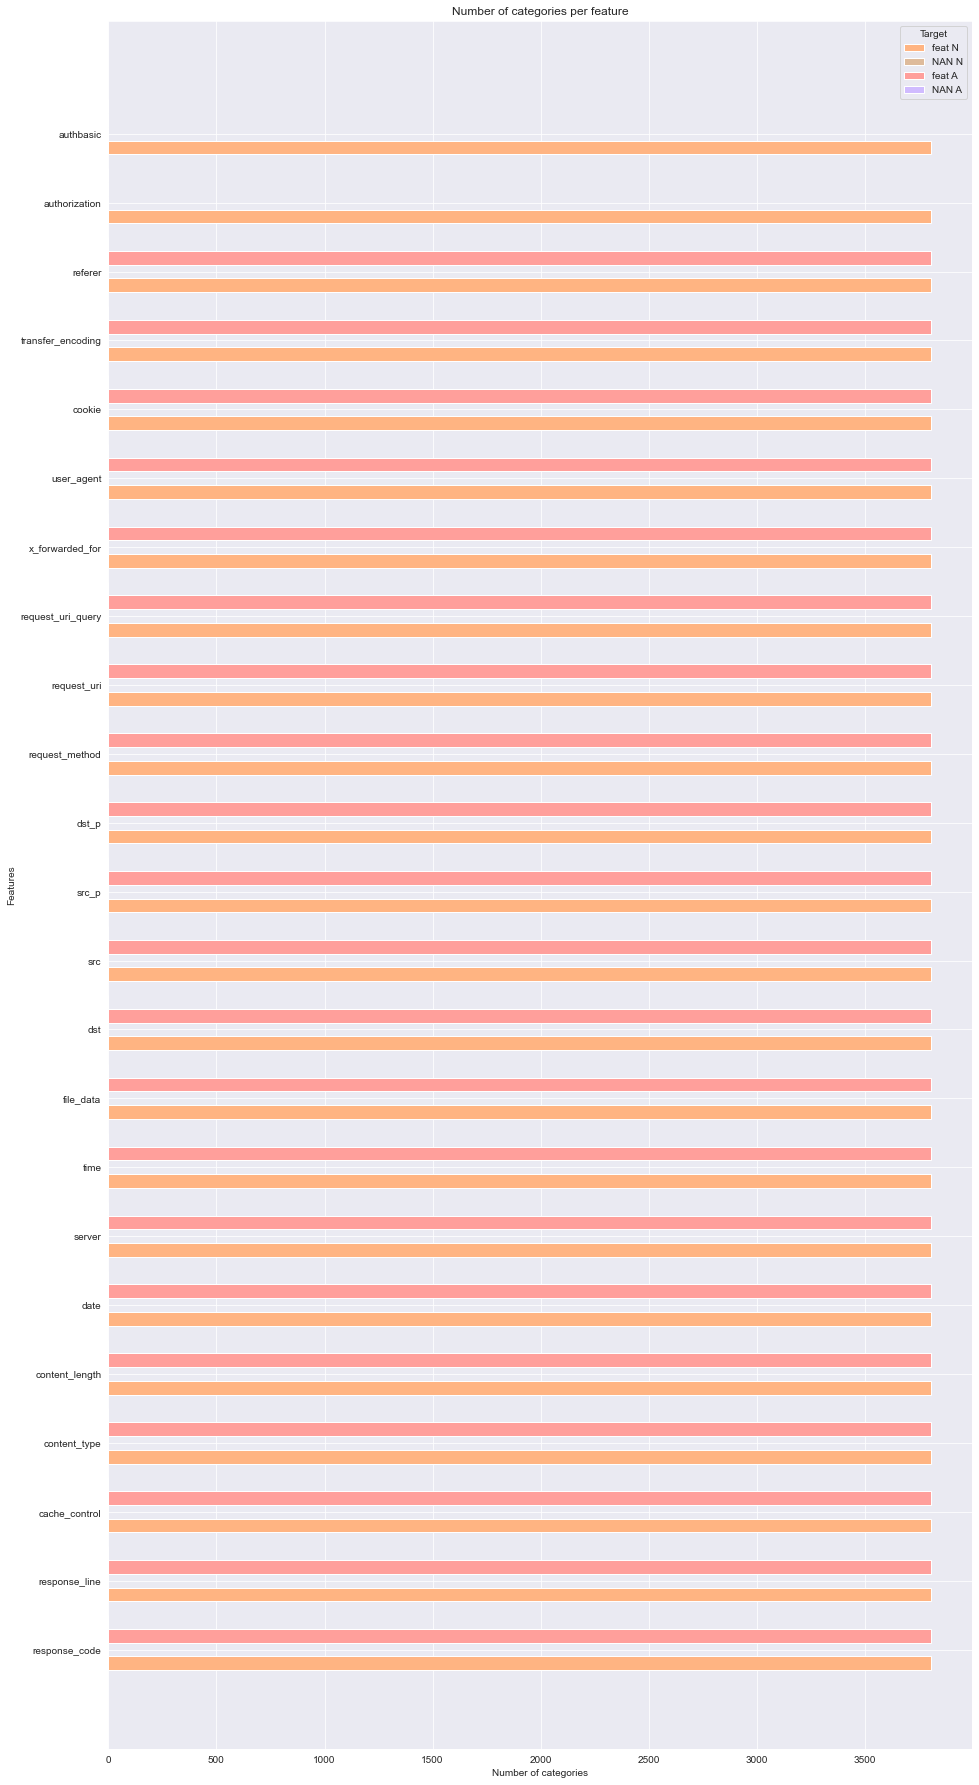

In [28]:
visualizing_overlap_and_NANS(data_n_e,data_a_e)

# 4. Adding extra features
adding time and request and response flow

In [35]:
import plotly.graph_objects as go
from collections import OrderedDict
import seaborn as sns
import random
import numpy as np
from collections import defaultdict

In [36]:
class APIflows2:
    def __init__(self,data):
        self.data = data
        self.flowdict = OrderedDict()
        self.paths = []
        self.flow()
        self.path_info()
    
    def flow(self):
        last = 0
        cate = cat_enc(self.data['request_uri'])
        frames = {}
        for i in range(len(self.data)):
            if math.isnan(float(self.data['prev_request_in'][i])):
                self.add_flow_to_dict(0,cate[i])

                frames[self.data['frame'][i]] = [((0,cate[i]))]
            else:
                idx = self.data[self.data['frame']==self.data['prev_request_in'][i]].index.values

                if len(idx) > 1:
                    idx = [idx.flat[np.abs(idx - last).argmin()]]
                elif len(idx) < 1 or idx > i:
                    frames[self.data['frame'][i]] = [((0,cate[i]))]
                    continue
                
                last= idx[0]
                idx = idx[0]
                self.add_flow_to_dict(cate[idx], cate[i])
                frames[self.data['frame'][idx]].append(((cate[idx],cate[i])))
                frames[self.data['frame'][i]] = frames[self.data['frame'][idx]] 
                del frames[self.data['frame'][idx]]
        self.paths = list(frames.values())


                    
                    
    def add_flow_to_dict(self,flow1,flow2):
        '''Checks whether the flow is from the same user (by comparing coockies) and adds 
            them to the flow dict and source and target lists
            
            ***input***
            flow1 & flow2: the flows of the first and second user            
            '''
        if ((flow1,flow2)) not in self.flowdict:
            self.flowdict[((flow1,flow2))] = 1

        else:
            self.flowdict[((flow1,flow2))] += 1
            
    def path_info(self):    
        '''Get the shortest and longest paths
            Also get which paths are taken most often'''
        self.shortest = self.paths
        self.shortest.sort(key=lambda l: (len(l), l))
        self.numbers = {}
        
        for i in range(len(self.paths)):
            if tuple(self.paths[i]) in list(self.numbers.keys()):
                self.numbers[tuple(self.paths[i])] += 1  
            
            else:    
                self.numbers[tuple(self.paths[i])] = 1



In [37]:
def cat_enc(col):
    '''encode one column into categorical encoding'''
    
    col = pd.factorize(col)[0] + 1
    return col

flows_a = APIflows2(data_a)
flows_n =  APIflows2(data_n)

In [147]:
def create_sankey(flows,n,lab,option='default'):
    '''creates sankey diagram according to option for flow
        *** input***
            flows - the object containing the dicts and lists of flows/paths
            n - the number of flows  you want visualised
            lab - the labels for each flow
            option - the option of what needs to be visualised
            
        *** Options ***
            longest - The longest n paths users have taken
            shortest - The shortest n paths users have taken
            most - The n paths users take most offten
            least - The n paths users take least often
            defualt - Visualising the most seen api calls made from on point to another
        '''
    if option == 'longest':
        longest = flows.shortest
        longest.sort(key=lambda l: (len(l), l),reverse=True)
        plot_sankey(longest[:n], lab, flows.numbers,n)

    elif option == 'shortest':
        shortest = flows.shortest
        shortest.sort(key=lambda l: (len(l), l))
        plot_sankey(shortest[:n], lab, flows.numbers,n)
        
    elif option == 'most':
        flow_dict = dict(sorted(flows.numbers.items(), key=lambda x:x[1],reverse=True))
        plot_sankey(list(flow_dict.keys())[:n],lab, flows.numbers,n)
        
    elif option == 'least':
        flow_dict = dict(sorted(flows.numbers.items(), key=lambda x:x[1]))
        plot_sankey(list(flow_dict.keys())[:n], lab, flows.numbers,n)
        
    else:
        flow_dict = dict(sorted(flows.flowdict.items(), key=lambda x:x[1],reverse=True))
        plot_sankey(list(flow_dict.keys())[:n],lab, flow_dict,n)
        
        
def plot_sankey(s,lab,flow_dict,n):
    '''Plot the sankey diagram
    *** Input ***
        s - the source for each vertex
        lab - the label for each node
        flow_dict - the dictionary with paths containing edges and values
        n - the number of paths
    '''
    
    color_pal = sns.color_palette("Spectral",n).as_hex()
    
    # sort so that the sankey diagram is visualised in the right order
    s.sort()
    # if a list is used, some changes are made to visualise the paths
    if type(s[0]) is list:
        v = [[flow_dict[tuple(x)]] * len(x) for x in s]
        v1 = []
        s1 = []
        for i in range(len(s)):
            s1 = s1 + s[i]
            v1 = v1 + v[i]
        s =s1
        v =v1
    
    # this is used when there is not path just edges
    else:
        v = [flow_dict[x] for x in s]

    # creating label names instead of numbers
    l = ['client'] + [lab[x][:12] for x in range(1,len(lab))]
    
    # the dictionary is filled with tuples, so again some changes need to be added to representation
    if type(s[0][0]) is tuple:
        s1 = []
        for i in range(len(s)):
            s1 = s1 + list(s[i])
        s = s1
    
    # creating the figure
    fig = go.Figure(go.Sankey(
        arrangement='snap',
        node=dict(
              label = l,
            line = dict(color = "black", width = 0.5),
            pad=15,
            thickness=20,
        ),
        link=dict(
            source = list(np.array(s)[:,0]) ,
            target = list(np.array(s)[:,1]),
            value= v,
        )
    ))

    fig.show()

In [148]:
num_dict = data_n['request_uri'].to_dict()
create_sankey(flows_n,20, num_dict,'default')
num_dict2 = data_a['request_uri'].to_dict()
create_sankey(flows_a,20, num_dict2,'default')

In [183]:
create_sankey(flows_n,1, num_dict,'longest')
create_sankey(flows_a,1, num_dict2,'longest')

In [150]:
create_sankey(flows_n,7, num_dict,'shortest')
create_sankey(flows_a,7, num_dict2,'shortest')

In [151]:
create_sankey(flows_n,50, num_dict,'most')
create_sankey(flows_a,20, num_dict2,'most')

In [152]:
create_sankey(flows_n,50, num_dict,'least')
create_sankey(flows_a,50, num_dict2,'least')

# 5. Preprocessed dataset assesment


In [176]:
def split_features1():
    '''the split of features that I want encoded a particular way'''
    
    categorical_feats = ['user_agent','response_line','cache_control', 'content_length','server','file_data','dst','src','src_p','dst_p','request_method','request_uri','request_uri_query','x_forwarded_for','user_agent','cookie','transfer_encoding','referer','authorization','authbasic','content_type','response_code','date']
    numerical = ['time']
    return categorical_feats, numerical
    
def data_f(data_a,data_n):
    '''add the normal and abnormal data together and add an extra column for targets'''
    
    data_a['target'] = [0 * i for i in range(len(data_a))]
    data_n['target'] = [i**0 for i in range(len(data_n))]
    data = pd.concat([data_n,data_a])
    
    data,_ = remove_unessecary_data(data,data,[])
    return data

data = data_f(data_a_e, data_n_e)

print(len(data_n_e),len(data_a_e))
# visualise_distribution(data_n_e,data_a_e)

# distribution(i,len(data_n_e),data_n_e,data_a_e)


categorical, continuous = split_features1()
print(categorical,'whop',continuous)
data = change_values(data, continuous, categorical)

3808 3808
['user_agent', 'response_line', 'cache_control', 'content_length', 'server', 'file_data', 'dst', 'src', 'src_p', 'dst_p', 'request_method', 'request_uri', 'request_uri_query', 'x_forwarded_for', 'user_agent', 'cookie', 'transfer_encoding', 'referer', 'authorization', 'authbasic', 'content_type', 'response_code', 'date'] whop ['time']
cont ['time'] cat ['user_agent', 'response_line', 'cache_control', 'content_length', 'server', 'file_data', 'dst', 'src', 'src_p', 'dst_p', 'request_method', 'request_uri', 'request_uri_query', 'x_forwarded_for', 'user_agent', 'cookie', 'transfer_encoding', 'referer', 'authorization', 'authbasic', 'content_type', 'response_code', 'date']
num response_code
num response_line
num cache_control
num content_type
num content_length
num date
num server
string time
num file_data
num dst
num src
num src_p
num dst_p
num request_method
num request_uri
num request_uri_query
num x_forwarded_for
num user_agent
num cookie
num transfer_encoding
num authorization

In [177]:
def data_tabling(data):
    '''Displays a pandas dataframe that shows the number of different classes in each feature, 
    the average amount that the same feature is seen, the minimum amount that one of the classes of the feature is seen,
    and the maximum amount that the class of a feature is seen
    This gives us insight in which classes are used a lot within each feature'''
    max_n = []
    min_n = []
    avg_n = []
    classes_n = []
    total_n = []
    data = [data[: int(len(data)/2)], data[int(len(data)/2):]]
    for i in range(2):
        # the amount of times a feature class is present in the data
        feature_classes = [len(data[i][column].unique()) if len(data[i][column].unique()) != 0 else [0] for column in data[i].columns]
        feature_numbers = [data[i][column].value_counts() if len(data[i][column].value_counts()) != 0 else [0] for column in data[i].columns]

        max_n.append([max(x) for x in feature_numbers])
        min_n.append([min(x) for x in feature_numbers])
        avg_n.append([np.mean(x) for x in feature_numbers])
        classes_n.append([x for x in feature_classes])
        total_n.append([sum(x) for x in feature_numbers])
    
    names = ['Features','Max. cat normal', 'Min. cat. normal','Avg. cat. normal','Amount of Categories normal','Total calls normal','Max. cat. abnormal', 'Min. cat. abnormal','Avg. cat. abnormal','Amount of Categories abnormal','Total calls abnormal']
    
    columns = [[data[0].columns[i], max_n[0][i], min_n[0][i], avg_n[0][i], classes_n[0][i],total_n[0][i],max_n[1][i], min_n[1][i], avg_n[1][i], classes_n[1][i],total_n[1][i]] for i in range(len(data[0].columns))] 
    df = pd.DataFrame(columns, columns=names)
#     display(df)
    return(df)
data_tabling(data)

Features  Max. cat normal  Min. cat. normal  Avg. cat. normal  \
0       response_code             3375                 5        634.666667   
1       response_line             2739              1069       1904.000000   
2       cache_control             2997               811       1904.000000   
3        content_type             2512                 1        952.000000   
4      content_length             2775                 1        544.000000   
5                date                5                 1          1.343210   
6              server             2179                16        952.000000   
7                time                9                 1          1.286921   
8           file_data             1613                 1          5.223594   
9                 dst             1613                 1        476.000000   
10                src             2737              1071       1904.000000   
11              src_p              134                 1          1.863014   
12              dst_p             1124               743        952.000000   
13     request_method             3389                89       1269.333333   
14        request_uri              870                 1          5.363380   
15  request_uri_query             2088                 1          5.526851   
16    x_forwarded_for             2737              1071       1904.000000   
17         user_agent             2190                 1        544.000000   
18             cookie             2526                 1        544.000000   
19  transfer_encoding             2532              1276       1904.000000   
20      authorization             3807                 1       1904.000000   
21          authbasic             3807                 1       1904.000000   
22             target             3808              3808       3808.000000   
23            referer             3808              3808       3808.000000   

    Amount of Categories normal  Total calls normal  Max. cat. abnormal  \
0                             6                3808                2542   
1                             2                3808                3003   
2                             2                3808                2595   
3                             4                3808                2974   
4                             7                3808                2974   
5                          2835                3808                  99   
6                             4                3808                1620   
7                          2959                3808                  16   
8                           729                3808                2744   
9                             8                3808                2072   
10                            2                3808                2997   
11                         2044                3808                  98   
12                            4                3808                1152   
13                            3                3808                3778   
14                          710                3808                1152   
15                          689                3808                3698   
16                            2                3808                2997   
17                            7                3808                2072   
18                            7                3808                2444   
19                            2                3808                3576   
20                            2                3808                3808   
21                            2                3808                3808   
22                            1                3808                3808   
23                            1                3808                2497   

    Min. cat. abnormal  Avg. cat. abnormal  Amount of Categories abnormal  \
0                    2          544.000000                              7   
1                  805         1

We can see from this table and the weight of evidence values below, that there are quite a lot of features that have very different categories. This means that when encoding the features into for example one hot encodings, this would mean very different vectors for either. For hasing encoding it will be the same. Categorical and frequency this will also be the case. However, is this a problem..? I honestly do not know. Since it still depends on the conditional relations between these values. It might overfit on values that are different, but that could aslo be the final conclusion on telling them apart.

I need to look into what this means. 

For now I would assume that the least telling features are the ones that are present once in a blue moon in either the "good" or the "bad" data

# 6. Feature Encodings

In [178]:
from category_encoders import *

def one_hot(data):
    '''encode full dataframe in one hot encoding'''
    
    one_hot_enc = pd.get_dummies(data)
    return one_hot_enc

def hashing(data):
    '''encode full '''
    enc = HashingEncoder().fit(data)
    numeric_dataset = enc.transform(data)
    return numeric_dataset

def WoE_encoding(data, not_count):
    '''weight of evidence encoding'''
    
    df = {}
    for col in data.columns:
        # calculate the WoE of each category of each feature, leave some of the data out, if it is not existent in both.
        if col not in not_count:
            woe_iv_dict = {}
            
            # create multi-index dataframe to better handle the indexing for this.
            feat_num2 =  data.groupby(col,as_index=False)['target'].value_counts()
            s = pd.Series(list(feat_num2['count']), index= pd.MultiIndex.from_tuples(list(zip(*[list(feat_num2['target']),list(feat_num2[col])])), names=["first", "second"]))
            dicty = dict(s)

            for cat in feat_num2[col]:
                # check if both normal and anomalous data is present, if not fill in 0 for this.
                if (1,cat) not in dicty or (0,cat) not in dicty:
                    if (1,cat) in dicty:
                         woe, IV = WoE(s.loc[1,cat],0,s[1].sum(),s[0].sum())
                    elif (0, cat) in dicty:
                         woe, IV = WoE(0,s.loc[0,cat],s[1].sum(),s[0].sum())
                else:
                    woe, IV = WoE(s.loc[1,cat],s.loc[0,cat],s[1].sum(),s[0].sum())
                    
                woe_iv_dict[cat] = [woe,IV]

                df['total_'+str(col)] = [sum([x[0] for x in list(woe_iv_dict.values())]), sum([x[1] for x in list(woe_iv_dict.values())])]    
        df1 = pd.DataFrame.from_dict(woe_iv_dict)
    df = pd.DataFrame.from_dict(df,orient='index',columns=['total_WoE','total_IV'])
    display(df)

    return df
        

def WoE(x1,x2,tot1,tot2):
    '''calculate the WoE for the categories in a feature'''
    #change prop in second part as well
    
    if x1 == 0 or x2 ==0:
        prop_g = (x1 + 0.5) /tot1
        prop_b = (x2 + 0.5) /tot2  
    else:
        prop_g = x1 / tot1
        prop_b = x2 / tot2
    
    woe = np.log(prop_g / prop_b)

    IV = woe * (prop_g - prop_b)
    return woe, IV


def freq(data):
    '''encode full dataframe in frequency encoding'''
    enc = CountEncoder().fit(data)
    numeric_dataset = enc.transform(data)
    return numeric_dataset


def categorical_encoding(df):
    '''encode full dataframe as categorical encoding'''
    
    df = copy.deepcopy(df)
    for col in df.columns:
        df[col] = pd.factorize(df[col])[0] + 1
    return df

not_count = ['authorization', 'authbasic', 'location', 'target']
woe_df = WoE_encoding(data, not_count)
freq(data)

total_WoE   total_IV
total_response_code        -6.409900   2.730573
total_response_line         0.191618   0.026043
total_cache_control        -6.454991   0.600803
total_content_type        -43.201115   3.808718
total_content_length     -185.311932   2.302015
total_date               1817.879343   4.415726
total_server               -2.179001   0.126262
total_time                597.441389   1.901641
total_file_data           563.367237   3.001025
total_dst                  -3.666189  15.731615
total_src                   0.187197  16.764540
total_src_p              -136.112868   4.697804
total_dst_p                -0.021504   0.059893
total_request_method        7.476621   0.321249
total_request_uri         333.963436   3.351857
total_request_uri_query   812.765316   1.805790
total_x_forwarded_for       0.187181   3.737674
total_user_agent          -64.148926   8.121630
total_cookie             -354.404070   4.011547
total_transfer_encoding     1.359513   0.562023
total_referer             -69.336357   2.214183

response_code  response_line  cache_control  content_type  \
8579            5917           5742           1683          1282   
4580            5917           1874           1683          1282   
5929            5917           1874           5592          5486   
3863            5917           5742           5592          5486   
11648           5917           1874           1683          1282   
...              ...            ...            ...           ...   
3803             656           5742           1683          5486   
3804             656           1874           1683          5486   
3805             656           5742           1683          5486   
3806             656           1874           1683          5486   
3807             656           5742           1683          5486   

       content_length  date  server      time  file_data   dst  ...  \
8579              813     2    3799  0.002337        813  1119  ...   
4580              813     4    3799  0.002242        813  1071  ...   
5929             5749     1    3799  0.040533          1  1071  ...   
3863             5749     1    2022  0.000670       4357  1613  ...   
11648             813     2    3799  0.001585        813  1071  ...   
...               ...   ...     ...       ...        ...   ...  ...   
3803             5749    99    3799  0.000875       4357   887  ...   
3804             5749    99    3799  0.000524       4357   811  ...   
3805             5749    99    3799  0.000739       4357   887  ...   
3806             5749    99    3799  0.000818       4357   811  ...   
3807             5749    99    3799  0.001510       4357   887  ...   

       request_uri  request_uri_query  x_forwarded_for  user_agent  cookie  \
8579           112                112             5734        2190     361   
4580            81                 81             1071        2190     424   
5929             1                  1             1071        2190    4970   
3863          2022               5786             5734        3685    4970   
11648          112                112             1071        2190     226   
...            ...                ...              ...         ...     ...   
3803            30               5786             5734        1247     713   
3804            30               5786              811        1247     713   
3805            30               5786             5734        1247     713   
3806            30               5786              811        1247     713   
3807            30               5786             5734        1247     713   

       transfer_encoding  authorization  authbasic  target  referer  
8579                6108           7615       7615       1     6305  
4580                6108           7615       7615       1     6305  
5929                1508           7615       7615       1     6305  
3863                6108           7615       7615       1     6305  
11648               6108           7615       7615       1     6305  
...                  ...            ...        ...     ...      ...  
3803                6108           7615       7615       0       60  
3804                6108           7615       7615       0       60  
3805                6108           7615       7615       0       60  
3806                6108           7615       7615       0       60  
3807                6108           7615       7615       0       60  

[7616 rows x 24 columns]

|Information Value (IV) |  Predictive Power |\
-------------------------------------------------\
|< 0.02 | useless for prediction|\
|0.02 to 0.1 | weak predictor|\
|0.1 to 0.3 | medium predictor|\
|0.3 to 0.5 | strong predictor|\
|> 0.5  | suspicious or too good to be true|

so the interesting features according to WoE 

In [179]:
def measure_predictor_value_woe(woe_df):
    strong_predictors = []
    weak_predictors = []
    medium_predictors = []
    suspicious = []
    useless = []
    very_suspicious = []
    for i, num in enumerate(woe_df['total_IV']):


        if num < 0.5 and num > 0.3:
            strong_predictors.append(woe_df.index[i])
        elif num < 0.1 and num > 0.02:
            weak_predictors.append(woe_df.index[i])
        elif num < 0.02:    
            useless.append(woe_df.index[i])
        elif num > 0.1 and num < 0.3:    
            medium_predictors.append(woe_df.index[i])
        elif num > 0.5 and num < 1:    
            suspicious.append(woe_df.index[i])
        elif num > 1:
            very_suspicious.append(woe_df.index[i])

    print('strong predictors', strong_predictors)
    print()
    print('medium predictors', medium_predictors)
    print()
    print('weak_predcitors', weak_predictors)
    print()
    print('useless', useless)
    print()
    print('suspicious', suspicious)
    print('very suspicious', very_suspicious)
  
measure_predictor_value_woe(woe_df)

strong predictors ['total_request_method']

medium predictors ['total_server']

weak_predcitors ['total_response_line', 'total_dst_p']

useless []

suspicious ['total_cache_control', 'total_transfer_encoding']
very suspicious ['total_response_code', 'total_content_type', 'total_content_length', 'total_date', 'total_time', 'total_file_data', 'total_dst', 'total_src', 'total_src_p', 'total_request_uri', 'total_request_uri_query', 'total_x_forwarded_for', 'total_user_agent', 'total_cookie', 'total_referer']


# 7. Train - Val - Test split

In [180]:
def split(data_n,data_a):
    '''split the data into 70-20-10'''
    
    train_n = data_n.sample(frac=0.70)
    train_a = data_a.sample(frac=0.70)
    int_n = data_n.drop(train_n.index)
    int_a = data_a.drop(train_a.index)
    val_n = int_n.sample(frac=0.2)
    val_a = int_a.sample(frac=0.2)
#     test_n = int_n.drop(val_n.index)
    test_a = int_a.drop(val_a.index)
    
    train = pd.concat([train_n,train_a], ignore_index=True)
#     validation = pd.concat([val_n,val_a], ignore_index=True)
#     test = pd.concat([val_n,val_a], ignore_index=True)
    return train

#     return train, validation, test
train = split(data_n_e,data_a_e)
print(train)


     response_code           response_line      cache_control  \
0              200                       0                  0   
1              200  x-powered-by: Express   public, max-age=0   
2              200                       0                  0   
3              200  x-powered-by: Express                   0   
4              200                       0                  0   
...            ...                     ...                ...   
5327           200                       0                  0   
5328           200                       0                  0   
5329           304  x-powered-by: Express   public, max-age=0   
5330           200                       0                  0   
5331           200                       0                  0   

          content_type content_length                           date  \
0                    0              0  Thu, 20 Apr 2023 12:29:19 GMT   
1     application/json          10364  Thu, 20 Apr 2023 12:27:08 GMT   
2  

# 8. ML techniques

In [ ]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns

def clustering(data_m, data):
    
    # k-prototypes
    # k-means with one-hot encoding
    # normalise continuous data (numerical), so that one continuous data is not seen as more important than another. But only one continuous data so for now it does not have to\
    
    kmode = KModes(n_clusters=2, init = "random", verbose=1)
    clusters = kmode.fit_predict(data_m)
    #join data with labels 
    labels = pd.DataFrame(clusters)
    
    data['Cluster_Labels'] = kmode.labels_
    data['Segment'] = data['Cluster Labels'].map({0:'First', 1:'Second'})
    # Order the cluster
    data['Segment'] = data['Segment'].astype('category')
    data['Segment'] = data['Segment'].cat.reorder_categories(['First', 'Second'])

    
    data['Constant'] = 0 #dummy feature for plotting

    f, axes = plt.subplots(1, 4, figsize=(25, 7), sharex=False)
    f.subplots_adjust(hspace=0.2, wspace=0.7)
    print('hpo')
    for i in range(4):
        col = data.columns[i]
#         if i < 2:    
#             sns.catplot(x=col, y='labels', kind="swarm", hue='labels', data=data,ax=axes[i])
#         else:
        ax = sns.swarmplot(x=data['Constant'],y=data[col].values,hue=data['Cluster_Labels'],ax=axes[i])
        ax.set_title(col)
        print('HALLO')
    plt.close(2)
    plt.close(3)
    plt.show()
    
def regression():
    pass

def SVM():
    pass

def MCM():
    pass

# print(data)
data_matrix = data.to_numpy()

clustering(data_matrix,data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2110, cost: 67716.0
Run 1, iteration: 2/100, moves: 215, cost: 67441.0
Run 1, iteration: 3/100, moves: 0, cost: 67441.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 610, cost: 79070.0
Run 2, iteration: 2/100, moves: 2, cost: 79070.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 67441.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1934, cost: 68254.0
Run 4, iteration: 2/100, moves: 994, cost: 67441.0
Run 4, iteration: 3/100, moves: 0, cost: 67441.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2084, cost: 67441.0
Run 5, iteration: 2/100, moves: 0, cost: 67441.0
Init: initializing centroids
Init: initializin

In [ ]:
def ML_results():
    pass

def heatmap():
    pass


## 8.1 Best feature choices and why

## 8.2 Best feature encodings and why

# 9. Anomaly detection techniques 

In [ ]:
def isolation_forest():
    pass

def decision_tree():
    pass



In [ ]:
def Anomaly_results():
    pass

# 10. Deep learning techniques

In [ ]:
def AAE():
    pass

def CNN():
    pass

In [ ]:
def DL_results():
    pass